In [1]:
!pip install fcapy[all]
!pip install frozendict
!pip install ipynb
!pip install sparselinear
!pip install bitsets
!pip install bitarray
import torch
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git
import numpy as np
import pandas as pd

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-9_802_vy
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-9_802_vy
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit da1ed7f77cee21f3312ee9be6930e6a46f473781
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [67]:
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, accuracy_score, classification_report

In [68]:
from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = (1,1,1,1)

In [69]:
import neural_lib as nl

# Iris DataSet

We will work with iris-setosa

## Step 0. Binarize the data

In [70]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
# Создание нового DataFrame для бинаризированных данных
df_bin = pd.DataFrame()

In [72]:
step = 1.5 #шаг для бинаризации

In [73]:
# sepal_length
start, finish = df['sepal_length'].min(), df['sepal_length'].max()
for i in np.arange(start, finish, step):
    df_bin[f'sepal_length({i}, {i+step})'] = df['sepal_length'].between(i, i+step, inclusive='left')

# sepal_width
start, finish = df['sepal_width'].min(), df['sepal_width'].max()
for i in np.arange(start, finish, step):
    df_bin[f'sepal_width({i}, {i+step})'] = df['sepal_width'].between(i, i+step, inclusive='left')

# petal_length
start, finish = df['petal_length'].min(), df['petal_length'].max()
for i in np.arange(start, finish, step):
    df_bin[f'petal_length({i}, {i+step})'] = df['petal_length'].between(i, i+step, inclusive='left')

# petal_width
start, finish = df['petal_width'].min(), df['petal_width'].max()
for i in np.arange(start, finish, step):
    df_bin[f'petal_width({i}, {i+step})'] = df['petal_width'].between(i, i+step, inclusive='left')

In [74]:
df_bin['species'] = df['species']

# Добавление идентификаторов
df_bin['sample_id'] = ['iris_' + str(i) for i in range(df_bin.shape[0])]
df_bin.set_index('sample_id', inplace=True)
df_bin['is_setosa'] = df_bin['species'] == 'Iris-setosa'
df_bin.drop('species', axis=1, inplace=True)
df_bin.to_csv('iris_setosa_bin.csv')
df_bin

,"sepal_length(4.3, 5.8)","sepal_length(5.8, 7.3)","sepal_length(7.3, 8.8)","sepal_width(2.0, 3.5)","sepal_width(3.5, 5.0)","petal_length(1.0, 2.5)","petal_length(2.5, 4.0)","petal_length(4.0, 5.5)","petal_length(5.5, 7.0)","petal_width(0.1, 1.6)","petal_width(1.6, 3.1)",is_setosa
sample_id,,,,,,,,,,,,
iris_0,True,False,False,False,True,True,False,False,False,True,False,True
iris_1,True,False,False,True,False,True,False,False,False,True,False,True
iris_2,True,False,False,True,False,True,False,False,False,True,False,True
iris_3,True,False,False,True,False,True,False,False,False,True,False,True
iris_4,True,False,False,False,True,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
iris_145,False,True,False,True,False,False,False,True,False,False,True,False
iris_146,False,True,False,True,False,False,False,True,False,False,True,False
iris_147,False,True,False,True,False,False,False,True,False,False,True,False


In [75]:
y_feat = 'is_setosa'

In [76]:
df_train, df_test = train_test_split(df_bin, train_size=0.7, random_state=0)
X_train, y_train = df_train.drop(y_feat, axis=1), df_train[y_feat]
X_test, y_test = df_test.drop(y_feat, axis=1), df_test[y_feat]
X_train.describe()

,"sepal_length(4.3, 5.8)","sepal_length(5.8, 7.3)","sepal_length(7.3, 8.8)","sepal_width(2.0, 3.5)","sepal_width(3.5, 5.0)","petal_length(1.0, 2.5)","petal_length(2.5, 4.0)","petal_length(4.0, 5.5)","petal_length(5.5, 7.0)","petal_width(0.1, 1.6)","petal_width(1.6, 3.1)"
count,105,105,105,105,105,105,105,105,105,105,105
unique,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,True,False,False,False,False,False,True,False
freq,54,58,98,90,90,71,96,65,83,64,64


In [77]:
X_test.describe()

,"sepal_length(4.3, 5.8)","sepal_length(5.8, 7.3)","sepal_length(7.3, 8.8)","sepal_width(2.0, 3.5)","sepal_width(3.5, 5.0)","petal_length(1.0, 2.5)","petal_length(2.5, 4.0)","petal_length(4.0, 5.5)","petal_length(5.5, 7.0)","petal_width(0.1, 1.6)","petal_width(1.6, 3.1)"
count,45,45,45,45,45,45,45,45,45,45,45
unique,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,True,False,False,False,False,False,True,False
freq,23,23,44,36,36,29,43,24,39,34,34


## Step 1. Build Monotone Concept Lattice

Put binarized data in FormalContext and compute monotone ConceptLattice

In [78]:
# Create a Formal Context from the training data
K_train = FormalContext.from_pandas(X_train)

# Print the Formal Context
K_train

FormalContext (105 objects, 11 attributes, 420 connections)
        |sepal_length(4.3, 5.8)|sepal_length(5.8, 7.3)|sepal_length(7.3, 8.8)|sepal_width(2.0, 3.5)|sepal_width(3.5, 5.0)|...|petal_length(2.5, 4.0)|petal_length(4.0, 5.5)|petal_length(5.5, 7.0)|petal_width(0.1, 1.6)|petal_width(1.6, 3.1)|
iris_60 |                     X|                      |                      |                    X|                     |...|                     X|                      |                      |                    X|                     |
iris_116|                      |                     X|                      |                    X|                     |...|                      |                      |                     X|                     |                    X|
iris_144|                      |                     X|                      |                    X|                     |...|                      |                      |                     X|                     |   

In [79]:
L = ConceptLattice.from_context(K_train, algo = 'Sofia', is_monotone=True)
len(L)

95

Compute F1 score for each formal concept (assuming that an object is predicted True if it is in the extent of the concept)

In [80]:
for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)

Select indices of the best concepts from the lattice

In [81]:
concepts_count = 20
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:concepts_count])

assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

Construct neural network based on concept lattice

In [82]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

Setup visuzalier for the architecture

In [83]:
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n',
    edge_cmap="hsv"
    )
set(X_train.columns)

{'petal_length(1.0, 2.5)',
 'petal_length(2.5, 4.0)',
 'petal_length(4.0, 5.5)',
 'petal_length(5.5, 7.0)',
 'petal_width(0.1, 1.6)',
 'petal_width(1.6, 3.1)',
 'sepal_length(4.3, 5.8)',
 'sepal_length(5.8, 7.3)',
 'sepal_length(7.3, 8.8)',
 'sepal_width(2.0, 3.5)',
 'sepal_width(3.5, 5.0)'}

Move the nodes in visualization to make it look pretty

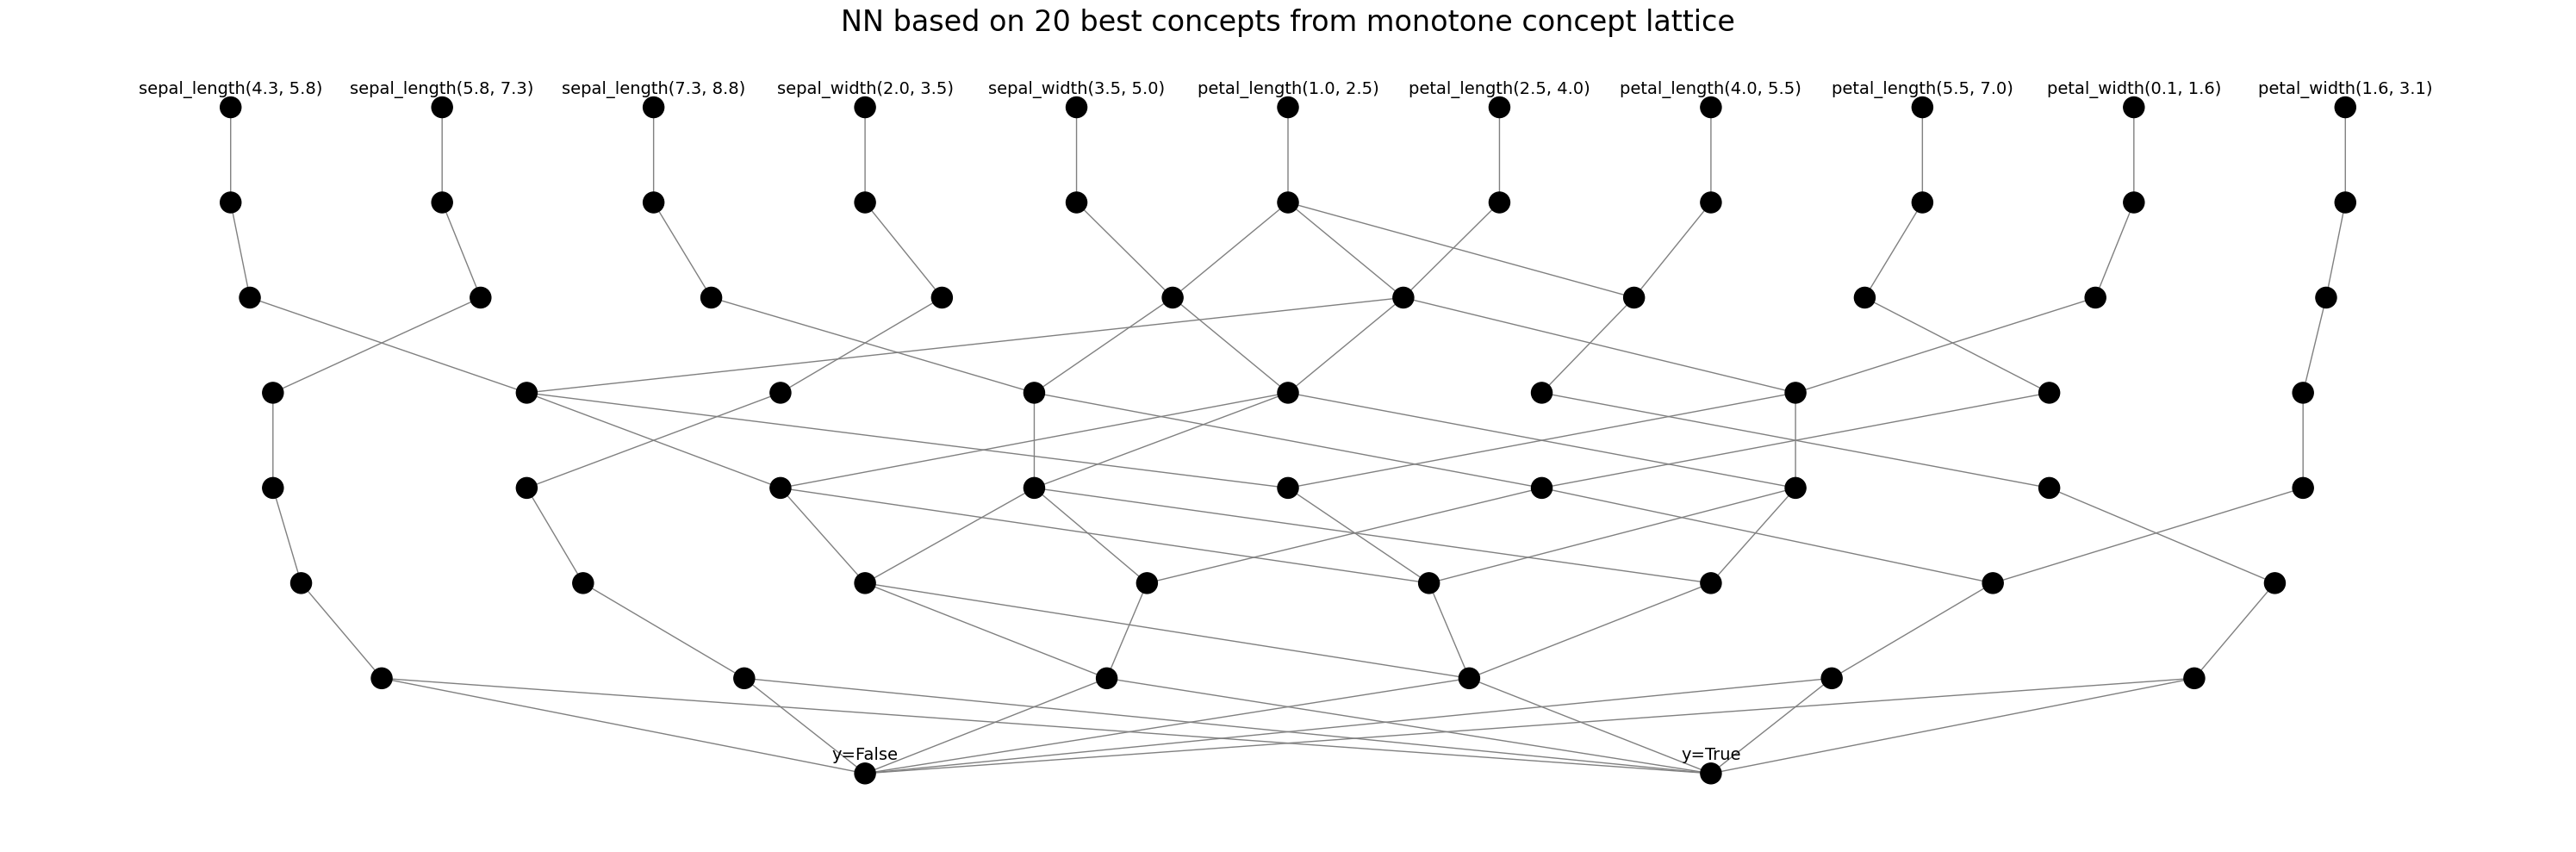

In [84]:
fig, ax = plt.subplots(figsize=(30, 10))

vis.draw_poset(
    cn.poset, ax=ax, edge_color='grey',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color='black',
)

plt.title(f'NN based on {20} best concepts from monotone concept lattice', loc='center', size=24)

plt.subplots_adjust()
plt.tight_layout()
plt.savefig('iris.png')
plt.show()

In [85]:
import torch
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

#cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs = 2500, nonlinearity=torch.nn.GELU)

In [86]:
print('Class predictions \n', cn.predict(X_test).numpy().astype(bool))
print('True classes \n', y_test.values)

Class predictions 
 [False False  True False  True False  True False False False False False
 False False False  True False False  True  True False False  True  True
 False  True  True False False  True False False  True False False False
  True False False False False  True False  True  True]
True classes 
 [False False  True False  True False  True False False False False False
 False False False  True False False  True  True False False  True  True
 False  True  True False False  True False False  True False False False
  True False False False False  True False  True  True]


Now fit the network

In [87]:
print("F1 score =", f1_score(y_test.values, cn.predict(X_test).numpy()))

F1 score = 1.0


In [88]:
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Recall score: 1.0
F1 score: 1.0
Accuracy score: 1.0


To obtain the prediction

In [89]:
edge_weights = cn.edge_weights_from_network()

Let us look at the fitted weights of edges

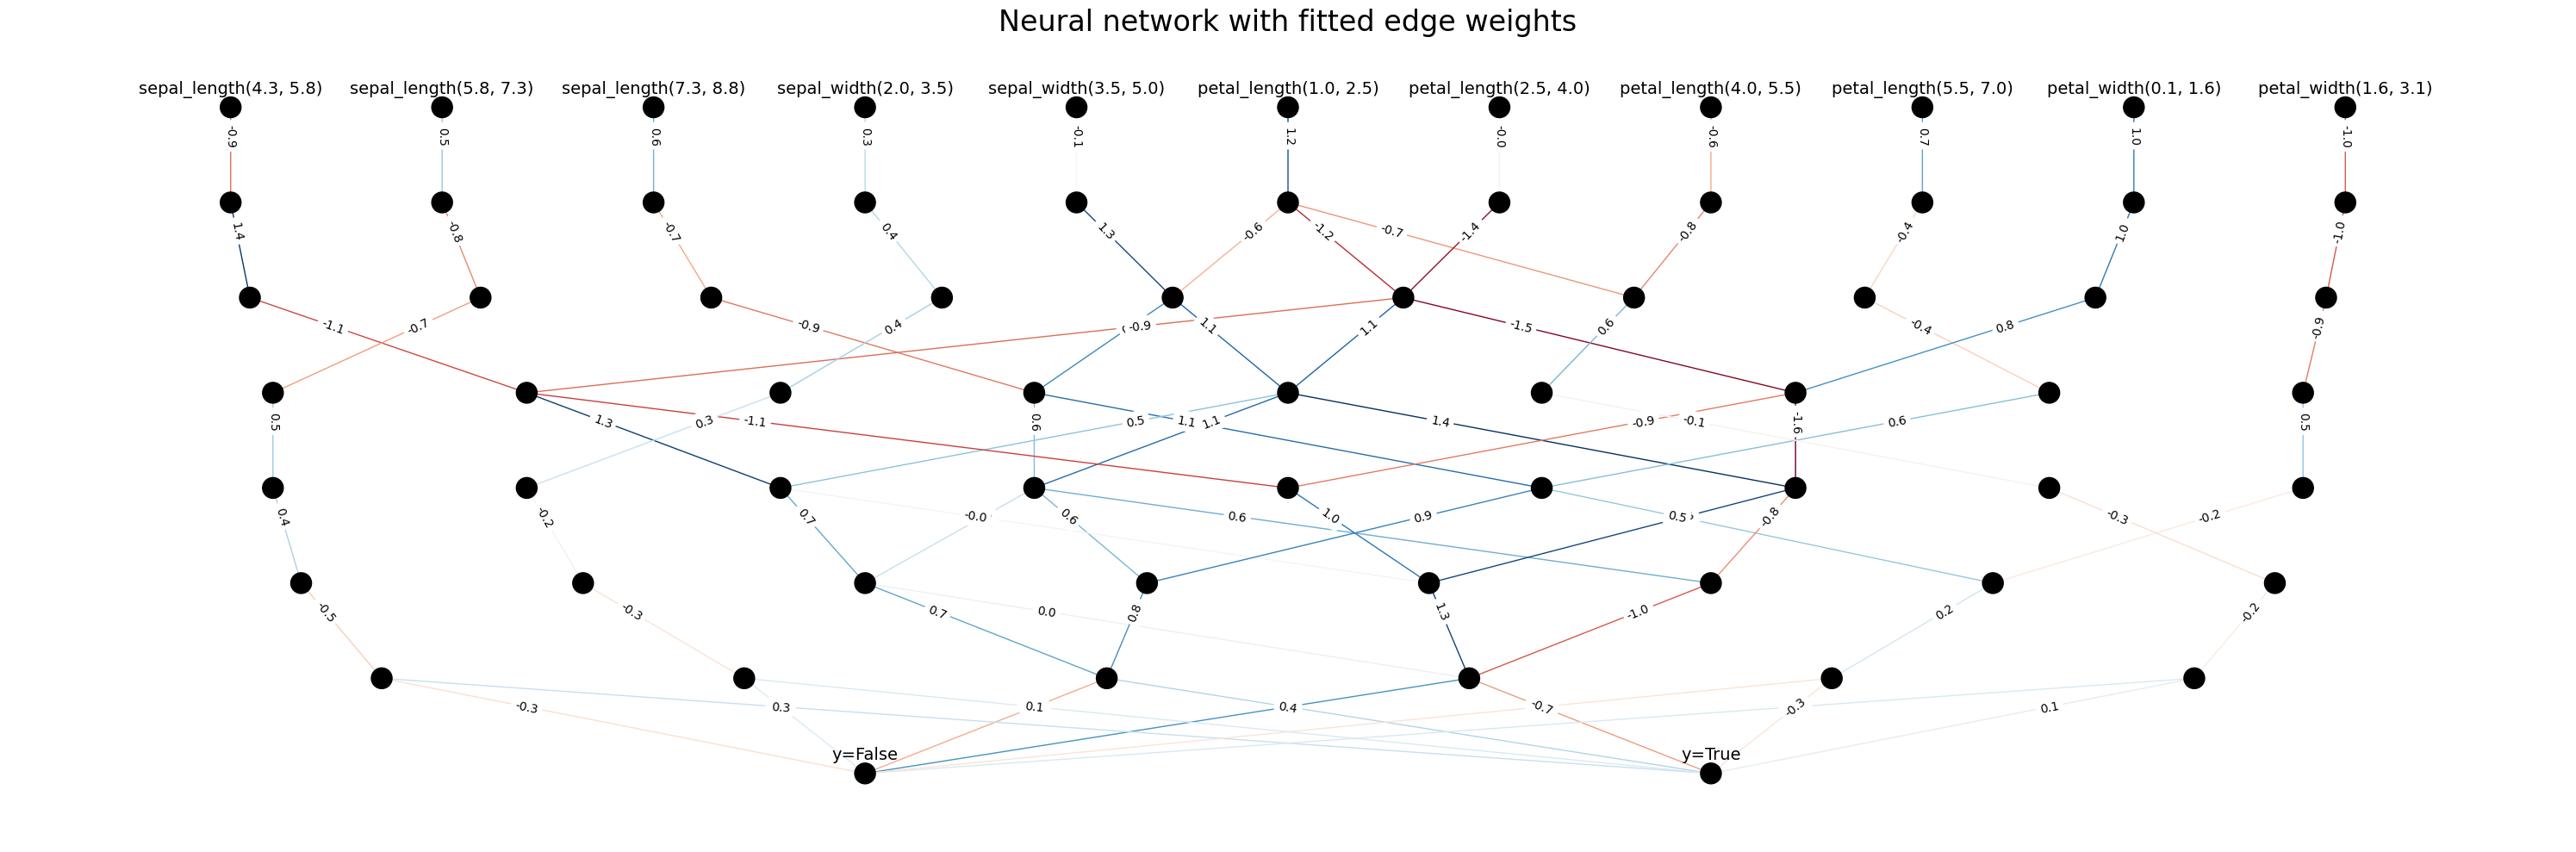

In [90]:
import networkx as nx
fig, ax = plt.subplots(figsize=(30,10))

vis.draw_poset(
    cn.poset, ax=ax, node_color='black',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, loc='center')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('iris_fitted.png')
plt.show()

# 70k+ Job Applicants Data (Human Resource)


In [91]:
df1 = pd.read_csv('stackoverflow_full.csv')
df1.drop(columns='Unnamed: 0', inplace=True)
df1 = df1.head(1000) # 76к observations this is too much, let's reduce their number
df1

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,<35,No,Undergraduate,1,Man,No,Dev,6,2,Egypt,11544.0,Python;Docker;Git,3,0
996,<35,No,Master,1,Man,No,Dev,9,5,Romania,35280.0,Bash/Shell;C#;PowerShell;Python;SQL;Git;ASP.NE...,12,1
997,>35,No,Master,0,Man,No,Dev,20,15,Portugal,95126.0,Assembly;C;C#;C++;HTML/CSS;JavaScript;Matlab;P...,25,1
998,>35,No,PhD,1,Man,No,Dev,25,15,France,81074.0,Bash/Shell;Elixir;Python;SQL;Ansible;Docker;Gi...,12,0


In [92]:
df1['Employed'].value_counts()

0    503
1    497
Name: Employed, dtype: int64

In [93]:
df = df1.drop(columns=['HaveWorkedWith']) # Получим 70к+ признаков, если применим OHE к этому столбцу
df = df.drop(columns=['Country']) # Получим не интерпретируемую картину, если применим OHE к этому столбцу, лучше без него

In [94]:
import pandas as pd

# One-Hot Encoding для бинаризации категориальных
df_encoded = pd.get_dummies(df, drop_first=True)

# Порог для числовых (среднее)
numerical_cols = ['Employment', 'YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills']
threshold = df[numerical_cols].mean()

for col in numerical_cols:
    df_encoded[col + '_bin'] = (df[col] > threshold[col])

# 0 и 1 -> True и False
df_encoded = df_encoded.astype(bool)

df_encoded.reset_index(drop=True, inplace=True)
df_encoded.index = 'employ' + (df_encoded.index + 1).astype(str)
df_encoded.to_csv('job_bin.csv')
df_encoded

,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,Age_>35,Accessibility_Yes,EdLevel_NoHigherEd,EdLevel_Other,...,EdLevel_Undergraduate,Gender_NonBinary,Gender_Woman,MentalHealth_Yes,MainBranch_NotDev,Employment_bin,YearsCode_bin,YearsCodePro_bin,PreviousSalary_bin,ComputerSkills_bin
employ1,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
employ2,True,True,True,True,True,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
employ3,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
employ4,True,True,True,True,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
employ5,False,True,True,True,True,False,True,False,False,False,...,False,False,False,False,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
employ996,True,True,True,True,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
employ997,True,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
employ998,False,True,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,True,True,True,True
employ999,True,True,True,True,True,False,True,False,False,False,...,False,False,False,False,False,True,True,True,True,False


In [95]:
y_feat = 'Employed'
df_train, df_test = train_test_split(df_encoded, train_size=0.7, random_state=0)
X_train, y_train = df_train.drop(y_feat, axis=1), df_train[y_feat]
X_test, y_test = df_test.drop(y_feat, axis=1), df_test[y_feat]
X_train.describe()

,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Age_>35,Accessibility_Yes,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_NonBinary,Gender_Woman,MentalHealth_Yes,MainBranch_NotDev,Employment_bin,YearsCode_bin,YearsCodePro_bin,PreviousSalary_bin,ComputerSkills_bin
count,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700
unique,2,1,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
freq,604,700,677,700,700,490,683,668,591,672,373,691,678,571,627,604,422,450,419,377


In [96]:
X_test.describe()

,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Age_>35,Accessibility_Yes,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_NonBinary,Gender_Woman,MentalHealth_Yes,MainBranch_NotDev,Employment_bin,YearsCode_bin,YearsCodePro_bin,PreviousSalary_bin,ComputerSkills_bin
count,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300
unique,2,1,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
freq,263,300,291,300,300,197,288,289,258,283,151,296,290,244,270,263,172,172,168,151


In [97]:
# Create a Formal Context from the training data
K_train = FormalContext.from_pandas(X_train)

# Print the Formal Context
K_train

FormalContext (700 objects, 20 attributes, 6073 connections)
         |Employment|YearsCode|YearsCodePro|PreviousSalary|ComputerSkills|...|Employment_bin|YearsCode_bin|YearsCodePro_bin|PreviousSalary_bin|ComputerSkills_bin|
employ106|         X|        X|           X|             X|             X|...|             X|             |                |                 X|                  |
employ69 |         X|        X|           X|             X|             X|...|             X|             |                |                  |                 X|
employ480|         X|        X|           X|             X|             X|...|             X|            X|               X|                 X|                  |
employ400|         X|        X|           X|             X|             X|...|             X|            X|                |                 X|                 X|
employ435|         X|        X|           X|             X|             X|...|             X|             |                |

In [98]:
L = ConceptLattice.from_context(K_train, algo = 'Sofia', is_monotone=True)
len(L)

98

In [99]:
for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)
    c.measures['recall_score'] = recall_score(y_train, y_preds)

In [100]:
concepts_count = 50
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:concepts_count])

assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

In [101]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

In [102]:
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n',
    edge_cmap="hsv"
    )
set(X_train.columns)

{'Accessibility_Yes',
 'Age_>35',
 'ComputerSkills',
 'ComputerSkills_bin',
 'EdLevel_NoHigherEd',
 'EdLevel_Other',
 'EdLevel_PhD',
 'EdLevel_Undergraduate',
 'Employment',
 'Employment_bin',
 'Gender_NonBinary',
 'Gender_Woman',
 'MainBranch_NotDev',
 'MentalHealth_Yes',
 'PreviousSalary',
 'PreviousSalary_bin',
 'YearsCode',
 'YearsCodePro',
 'YearsCodePro_bin',
 'YearsCode_bin'}

In [103]:
fig, ax = plt.subplots(figsize=(50,30))

vis.draw_poset(
    cn.poset, ax=ax, edge_color='grey',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color='black',
)

plt.title(f'NN based on {concepts_count} best concepts from monotone concept lattice', loc='center', size=24)

plt.subplots_adjust()
plt.tight_layout()
plt.savefig('job.png')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [104]:
import torch
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs = 2500, nonlinearity=torch.nn.GELU)

In [105]:
print('Class predictions \n', cn.predict(X_test).numpy().astype(bool))
print('True classes \n', y_test.values)

Class predictions 
 [ True  True False False  True False False  True  True False False  True
 False False  True  True False False False  True False False False  True
 False  True  True  True  True False  True False False  True False False
 False False False False  True False False  True  True  True False  True
 False False False False False False  True  True  True False  True  True
  True False  True False False  True False False False  True  True False
  True False False  True  True  True False False False  True  True False
  True False  True  True False False  True  True  True  True False False
 False  True  True False False False  True  True  True False  True  True
  True  True  True False False False False  True False False  True  True
  True False False False  True False False  True False False  True  True
 False False False False False False False  True False  True  True  True
  True False False  True  True  True False  True False False  True False
  True  True False  True False 

In [106]:
print("F1 score =", f1_score(y_test.values, cn.predict(X_test).numpy()))

F1 score = 0.8239202657807307


In [107]:
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Recall score: 0.8104575163398693
F1 score: 0.8239202657807307
Accuracy score: 0.8233333333333334


In [108]:
edge_weights = cn.edge_weights_from_network()

In [109]:
import networkx as nx
fig, ax = plt.subplots(figsize=(50,30))

vis.draw_poset(
    cn.poset, ax=ax, node_color='black',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, loc='center')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('job_fitted.png')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Wine

Пару раз возникала проблема что код не проходил проверку

assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

надо перезапустить среду выполнения и све работало

In [110]:
!pip3 install -U ucimlrepo

In [111]:
from ucimlrepo import fetch_ucirepo
from sklearn.utils import shuffle

wine = fetch_ucirepo(id=109)
X = wine.data.features
y = wine.data.targets

In [112]:
#make binary from multiclass

idx = y[y == 3].dropna().index

X = X.drop(idx)
y = y.drop(idx)

In [113]:
y['class'] = y['class'] == 1

In [114]:
sh_data = shuffle(pd.concat([X, y], axis=1))
df = sh_data.iloc[:129]
X = df.drop(columns=['class'], axis=1)
y = df['class']

In [115]:
#binarization by median value

for col in X.columns:
    median_val = X[col].median()
    X.loc[:, col] = X[col] >= median_val

In [116]:
X.reset_index(drop=True, inplace=True)
X.index = 'wine' + (X.index + 1).astype(str)
y.reset_index(drop=True, inplace=True)
y.index = 'wine' + (y.index + 1).astype(str)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,90,90,90,90,90,90,90,90,90,90,90,90,90
unique,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,True,False,True,True,True,False,True,False,False,True,True,False
freq,46,47,45,48,50,46,46,53,49,48,48,46,46


In [118]:
X_test.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,39,39,39,39,39,39,39,39,39,39,39,39,39
unique,2,2,2,2,2,2,2,2,2,2,2,2,2
top,True,False,True,False,False,False,True,False,True,True,False,True,True
freq,21,20,20,20,22,20,21,20,24,23,20,21,21


In [119]:
K_train = FormalContext.from_pandas(X_train)
K_train

FormalContext (90 objects, 13 attributes, 598 connections)
       |Alcohol|Malicacid|Ash|Alcalinity_of_ash|Magnesium|...|Proanthocyanins|Color_intensity|Hue|0D280_0D315_of_diluted_wines|Proline|
wine23 |      X|        X|   |                 |        X|...|               |              X|   |                           X|       |
wine45 |       |        X|  X|                X|        X|...|               |               |   |                            |       |
wine66 |       |        X|  X|                X|        X|...|               |               |   |                           X|       |
wine97 |      X|        X|  X|                 |        X|...|              X|              X|   |                           X|      X|
wine31 |       |         |   |                X|         |...|              X|               |   |                            |       |
wine63 |      X|         |  X|                 |        X|...|              X|              X|   |                           

In [120]:
L = ConceptLattice.from_context(K_train, algo = 'Sofia', is_monotone=True)
len(L)

80

In [121]:
for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)

In [122]:
concepts_count = 50
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:concepts_count])

assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

In [123]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

In [124]:
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n',
    edge_cmap="hsv"
    )
set(X_train.columns)

{'0D280_0D315_of_diluted_wines',
 'Alcalinity_of_ash',
 'Alcohol',
 'Ash',
 'Color_intensity',
 'Flavanoids',
 'Hue',
 'Magnesium',
 'Malicacid',
 'Nonflavanoid_phenols',
 'Proanthocyanins',
 'Proline',
 'Total_phenols'}

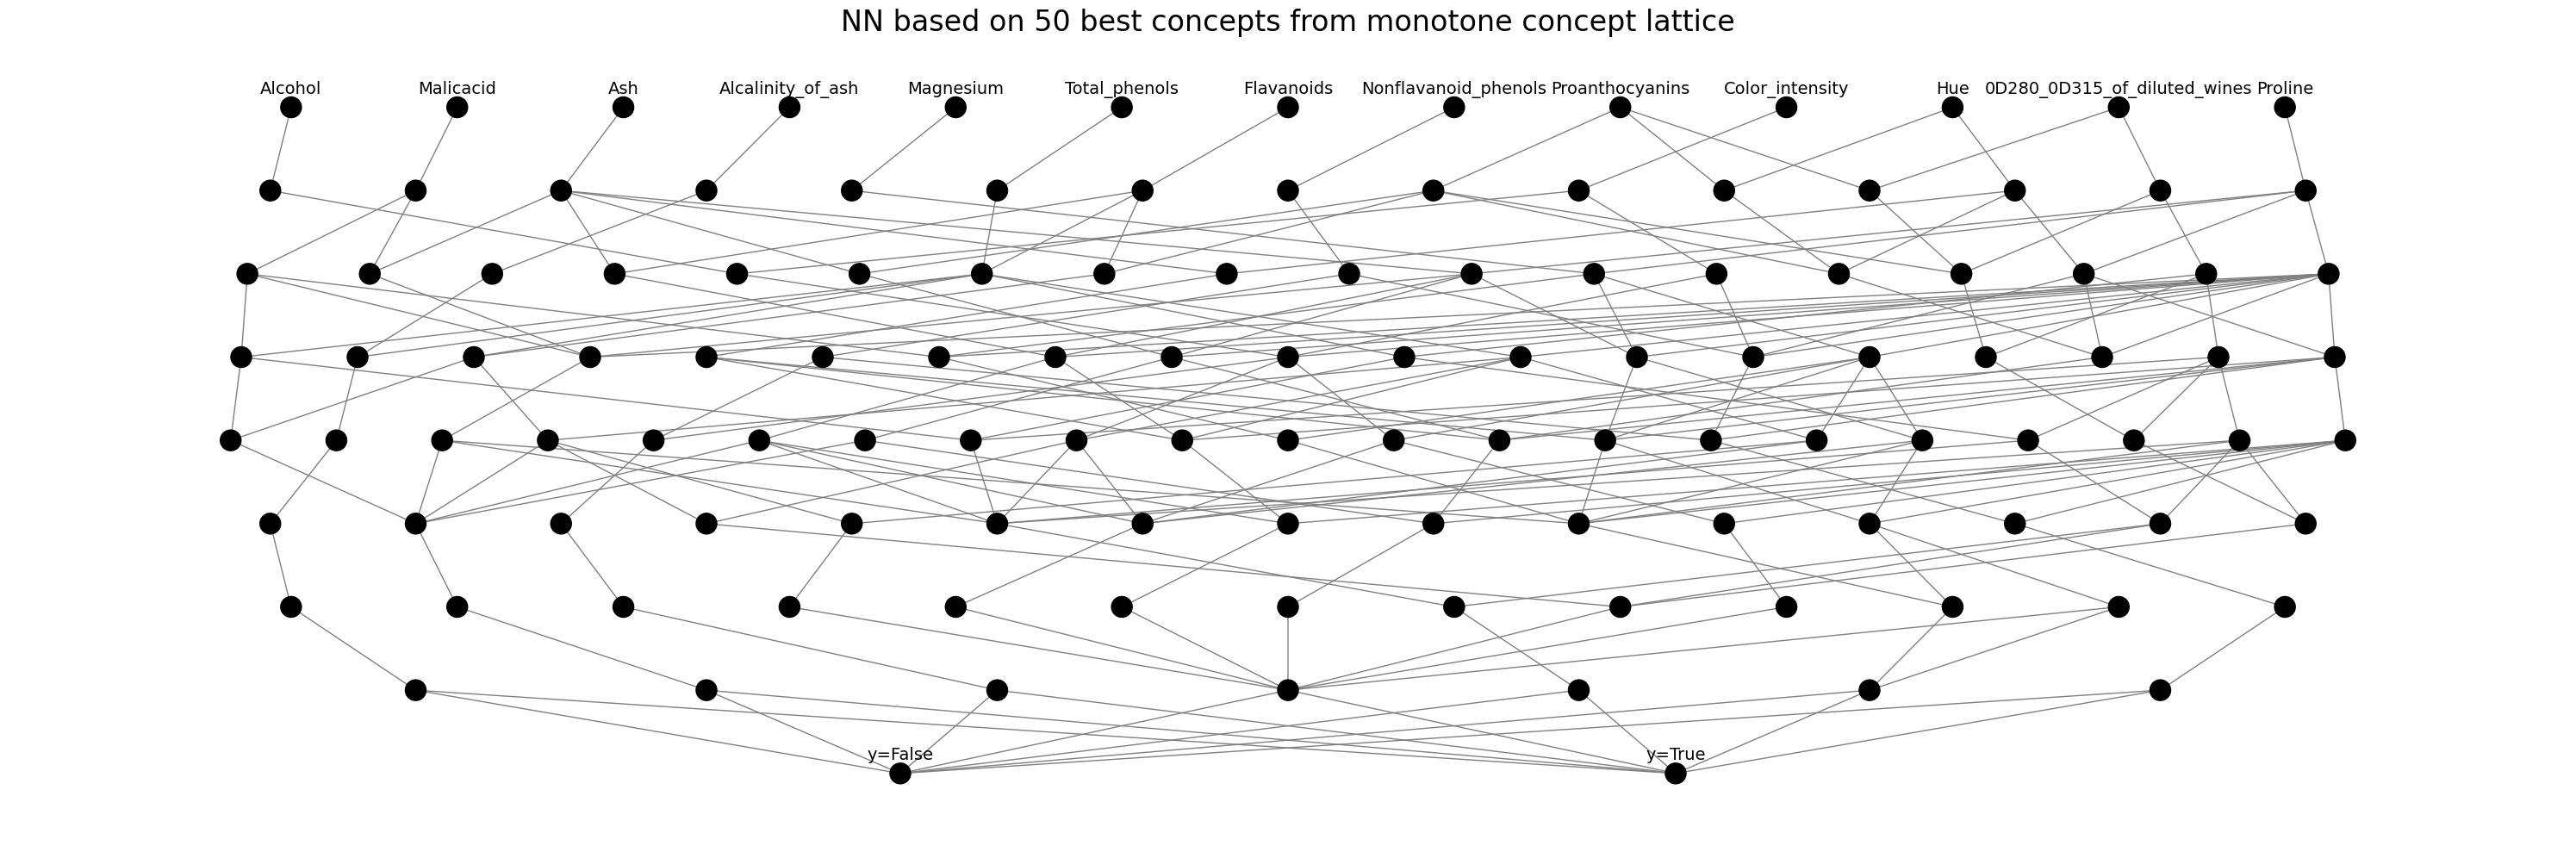

In [125]:
fig, ax = plt.subplots(figsize=(30, 10))

vis.draw_poset(
    cn.poset, ax=ax, edge_color='grey',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color='black',
)

plt.title(f'NN based on {concepts_count} best concepts from monotone concept lattice', loc='center', size=24)

plt.subplots_adjust()
plt.tight_layout()
plt.savefig('wine.png')
plt.show()

In [126]:
import torch
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs = 2000, nonlinearity=torch.nn.GELU)

In [127]:
print('Class predictions \n', cn.predict(X_test).numpy().astype(bool))
print('True classes \n', y_test.values)

Class predictions 
 [False False False  True False False  True  True  True False  True  True
 False False False  True False  True  True  True  True  True  True  True
  True False False  True  True False False False False  True  True  True
 False False  True]
True classes 
 [False False False  True False False  True  True  True False  True  True
 False False False  True False  True  True  True  True  True  True  True
  True False False  True  True False False False False  True False  True
 False False  True]


In [128]:
print("F1 score =", f1_score(y_test.values, cn.predict(X_test).numpy()))

F1 score = 0.975609756097561


In [129]:
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Recall score: 1.0
F1 score: 0.975609756097561
Accuracy score: 0.9743589743589743


In [130]:
edge_weights = cn.edge_weights_from_network()

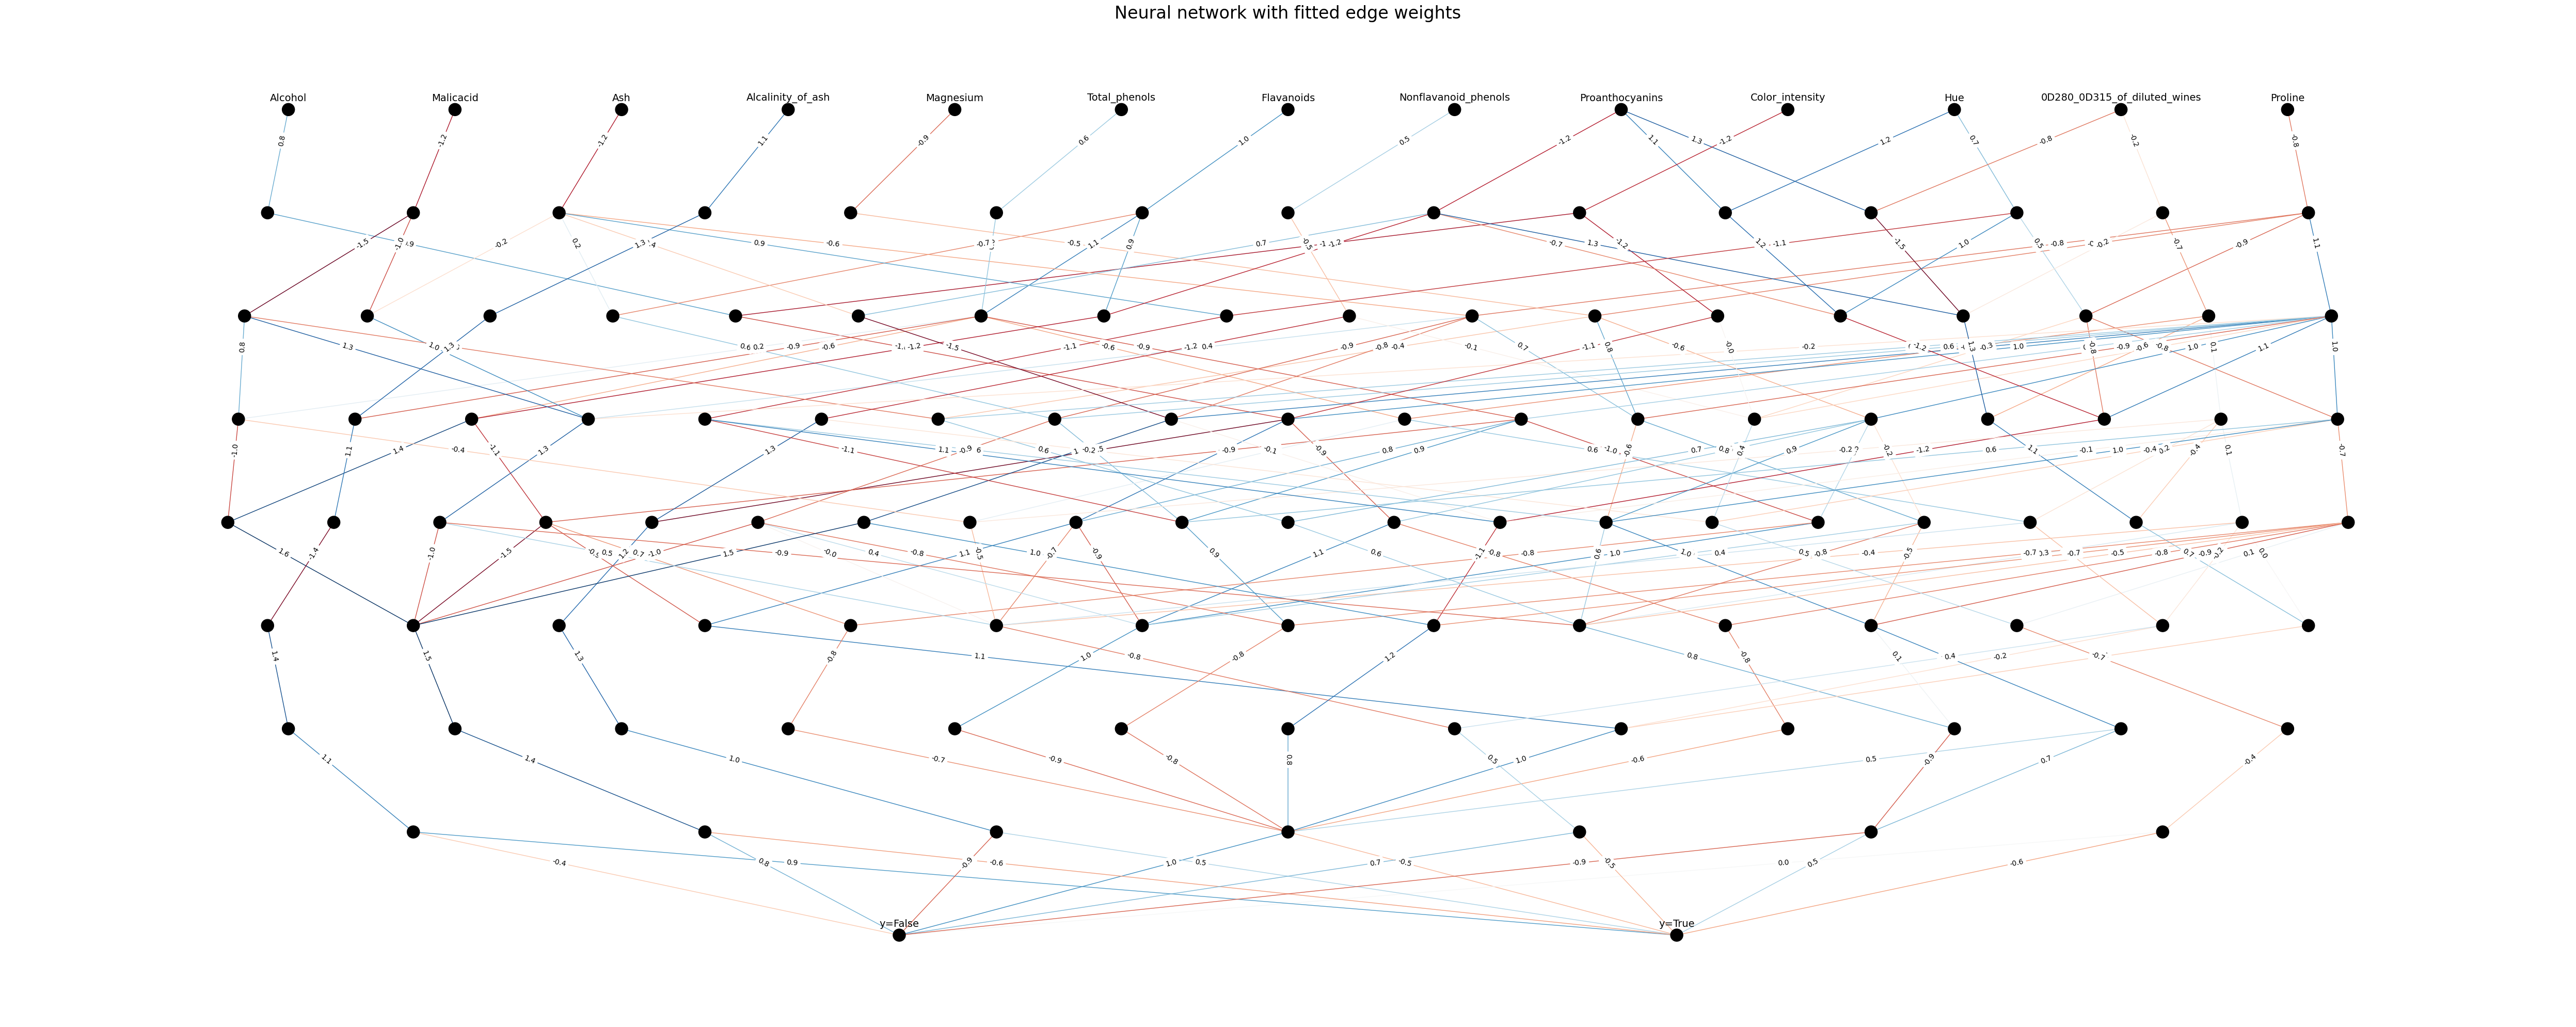

In [131]:
import networkx as nx
fig, ax = plt.subplots(figsize=(50,20))

vis.draw_poset(
    cn.poset, ax=ax, node_color='black',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, loc='center')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('wine_fitted.png')
plt.show()